[View in Colaboratory](https://colab.research.google.com/github/SKhan97/Machine-Learning---Bootcamp/blob/master/PCA.ipynb)

In [2]:
from google.colab import files
files.upload() #Import Iris data

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [3]:
data = pd.read_csv('Iris.csv').set_index('Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = np.array(data[data.columns[:-1]])
label_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2} #Map converting species to numerical values
Y = np.array([label_dict[i] for i in data[data.columns[-1]]])

print(Y)
print(X.shape)
print(Y.shape)

m = X.shape[0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)
(150,)


In [0]:
def normalise(x):
  x_std = x - np.mean(x, axis = 0)
  x_std = np.divide(x_std, np.std(x_std, axis = 0))
  return x_std

X_std = normalise(X)

In [6]:
def decompose(X):
  cov = np.matmul(X.T, X)
  print('Covariance matrix')
  print(cov)
  
  eig_vals, eig_vecs = np.linalg.eig(cov)
  print('Eigenvalues ', eig_vals)
  print('Eigenvectors ', eig_vecs)
  
  return eig_vals, eig_vecs, cov

eig_vals, eig_vecs, cov = decompose(X_std)

Covariance matrix
[[150.         -16.40538749 130.7631236  122.69304501]
 [-16.40538749 150.         -63.07741446 -53.48161344]
 [130.7631236  -63.07741446 150.         144.41356456]
 [122.69304501 -53.48161344 144.41356456 150.        ]]
Eigenvalues  [436.62271256 138.18313961  22.10299175   3.09115609]
Eigenvectors  [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


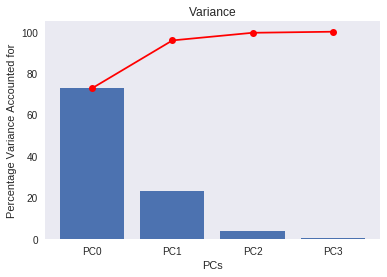

In [7]:
def whicheigs(eig_vals):
  total = sum(eig_vals)
  var_per = [(i/total)*100 for i in eig_vals]
  cum_var_percent = np.cumsum(var_per)
  
  fig = plt.figure()
  ax = fig.add_subplot(111)
  plt.title('Variance')
  ax.grid()
  plt.xlabel('PCs')
  plt.ylabel('Percentage Variance Accounted for')
  
  ax.plot(cum_var_percent, '-ro')
  ax.bar(range(len(eig_vals)), var_per)
  plt.xticks(np.arange(len(eig_vals)), ('PC{}'.format(i) for i in range(len(eig_vals))))
  
  plt.show()
  
whicheigs(eig_vals)

In [14]:
dims = 2

def reduce(x, eig_vecs, dims):
  W = eig_vecs[:, :dims]
  print('Dimension reducing matrix')
  print(W)
  
  return np.matmul(x, W), W

X_reduce, transform = reduce(X_std, eig_vecs, dims)

Dimension reducing matrix
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


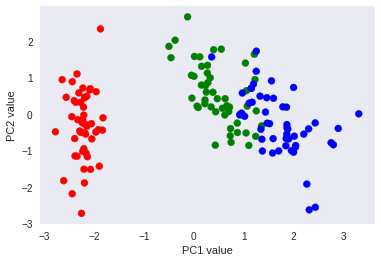

In [15]:
colour_dict = {0:'r', 1:'g', 2:'b'}
colour_list = [colour_dict[i] for i in list(Y)]

def plot_reduced(x):
  fig = plt.figure()      
  plt.grid()
  if dims == 3:
      ax = fig.add_subplot(111, projection='3d')      # add a 3d set of axes
      ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=colour_list)    # scatter plot our 3d data
      plt.xlabel('PC1 value')
      plt.ylabel('PC2 value')
      ax.set_zlabel('PC3 value')
  elif dims == 2:
      ax = fig.add_subplot(111)      # add a 2d set of axes
      ax.scatter(x[:, 0], x[:, 1], c=colour_list)    # scatter plot our 2d data
      plt.xlabel('PC1 value')
      plt.ylabel('PC2 value')
  elif dims == 1:
      ax = fig.add_subplot(111)       # add a 2d axis
      ax.scatter(x, np.zeros_like(x), c=colour_list)      # plot the 1D data along the x axis (zero for each y value)
      plt.xlabel('PC1 Value')
  plt.show()
  return ax

ax = plot_reduced(X_reduce)


In [0]:
epochs = 10

def k_means(x, y, centroids = 3):
  positions = 2 * np.random.randn(centroids,dims).reshape(centroids,dims)
  #Randomly initialise positions, let them converge to actual mean
  m = x.shape[0]
  
  for i in range(epochs):
    assignments = np.zeros(m)
    #For each point, calculate distance from each of the means 
    for datapoint in range(m):
      difference = X_reduce[datapoint] - positions
      norms = np.linalg.norm(difference, 2, axis = 1)
      
      assignment = np.argmin(norms)
      #print('Difference ', difference, 'Norms ', norms, 'Assignment ', assignment)
      #Assign to point which is closest
      assignments[datapoint] = assignment
  
  for c in range(centroids):
    positions[c] = np.mean(x[assignments == c], axis = 0)
    
  #print('Assignments ', assignment)
  #print ('Labels ', y)
  
  #print('Centroid positions')
  #print(positions)
  return positions


[[-2.22491665 -0.37570998]
 [ 0.27854804  0.9208881 ]
 [ 1.62999802 -0.38767237]]


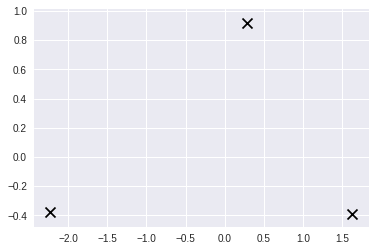

In [30]:
positions = k_means(X_reduce, Y, 3)


if dims == 3:
    plt.scatter(positions[:, 0], positions[:, 1], positions[:, 2], marker='x', s=100, c='k')
elif dims == 2:
    plt.scatter(positions[:, 0], positions[:, 1], marker='x', s=100, c='k')
elif dims == 1:
    plt.scatter(range(len(positions)),positions[:, 0], marker='x', s=100, c='k')

print(positions)
plt.show()
